<a href="https://colab.research.google.com/github/ctalamilla/uba-ceia-IIA_tf/blob/main/TP3_IA_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


a1805 Natalia Beatriz Diaz

e1401 Martin Nicolas Duarte

a1822 Cristian Patricio Salinas Talamilla

a1812 Ezequiel Eduardo Maudet

a1819 Manuel Pineyro

Tareas y preguntas a resolver:

1) ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

2) Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

3) Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

4) Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

5) Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

6) Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

7) Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](https://github.com/MOPineyro/fiuba_iia_18co2024_tp_final/blob/main/spam.png?raw=1)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

In [ ]:
dataset = pd.read_csv("spambase.csv") # cargando los datos desde un CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


# Nueva sección

Para obtener las palábras más usadas podemos hacer un `groupby`:

In [ ]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

In [ ]:
column_sum.head()

,spam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0,204860,681569,559220,2470,504739,124190,26160,107100,106080,...,1159138,800669,22840,142820,140182,442116,63242,306634,32475,60536
1,1,276190,298510,732080,298550,931799,317050,499309,377360,308320,...,226790,26700,2210,3810,37299,197563,14864,931352,316328,143003


In [ ]:
import pandas as pd

# Suponiendo que column_sum es tu DataFrame
# Dividir los datos en spam y no spam
spam_data = column_sum[column_sum['spam'] == 1]
no_spam_data = column_sum[column_sum['spam'] == 0]

# Obtener las columnas que representan las frecuencias de palabras (todas las columnas que comienzan con 'word_freq_')
word_columns = [col for col in column_sum.columns if col.startswith('word_freq_')]

# Sumar las frecuencias de palabras para cada grupo
spam_word_frequencies = spam_data[word_columns].sum()
no_spam_word_frequencies = no_spam_data[word_columns].sum()

# Obtener las 10 palabras más frecuentes en cada grupo
top_10_spam_words = spam_word_frequencies.sort_values(ascending=False).head(20)
top_10_no_spam_words = no_spam_word_frequencies.sort_values(ascending=False).head(20)

Top 20 palabras más comunes en correos spam:
word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
word_freq_remove       499309
word_freq_000          447910
word_freq_font         431560
word_freq_money        385950
word_freq_internet     377360
word_freq_credit       372610
word_freq_over         317050
word_freq_order        308320
word_freq_3d           298550
word_freq_address      298510
word_freq_make         276190
dtype: int64

Top 20 palabras más comunes en correos no spam:
word_freq_you           3541702
word_freq_george        3527559
word_freq_hp            2496576
word_freq_will          1495268
word_freq_your          1223098
word_freq_hpl           1204398
word_freq_re            1159138
word_freq_edu            800669
word_freq_address        681569
word_

1) ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [ ]:
# Imprimir los resultados
print("Top 20 palabras más comunes en correos spam:")
print(top_10_spam_words)

print("\nTop 20 palabras más comunes en correos no spam:")
print(top_10_no_spam_words)

Top 20 palabras más comunes en correos spam:
word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
word_freq_remove       499309
word_freq_000          447910
word_freq_font         431560
word_freq_money        385950
word_freq_internet     377360
word_freq_credit       372610
word_freq_over         317050
word_freq_order        308320
word_freq_3d           298550
word_freq_address      298510
word_freq_make         276190
dtype: int64

Top 20 palabras más comunes en correos no spam:
word_freq_you           3541702
word_freq_george        3527559
word_freq_hp            2496576
word_freq_will          1495268
word_freq_your          1223098
word_freq_hpl           1204398
word_freq_re            1159138
word_freq_edu            800669
word_freq_address        681569
word_

Palabras frecuentes que llamaron la atencion en los email de Spam

word_freq_email        578759

word_freq_business     521250

word_freq_money        385950

word_freq_internet     377360

word_freq_credit       372610

In [ ]:
# Obtener las 10 palabras menos frecuentes en cada grupo
bottom_10_spam_words = spam_word_frequencies.sort_values(ascending=True).head(20)
bottom_10_no_spam_words = no_spam_word_frequencies.sort_values(ascending=True).head(20)

# Imprimir los resultados
print("Top 20 palabras menos comunes en correos spam:")
print(bottom_10_spam_words)

print("\nTop 20 palabras menos comunes en correos no spam:")
print(bottom_10_no_spam_words)


Top 20 palabras menos comunes en correos spam:
word_freq_cs              100
word_freq_857             940
word_freq_lab            1240
word_freq_table          2210
word_freq_telnet         2310
word_freq_george         2810
word_freq_415            3220
word_freq_conference     3810
word_freq_meeting        4430
word_freq_parts          8540
word_freq_labs          10820
word_freq_project       11320
word_freq_85            12560
word_freq_original      15320
word_freq_hpl           16630
word_freq_pm            22530
word_freq_data          26400
word_freq_edu           26700
word_freq_hp            31690
word_freq_650           34080
dtype: int64

Top 20 palabras menos comunes en correos no spam:
word_freq_3d              2470
word_freq_000            19760
word_freq_credit         21130
word_freq_table          22840
word_freq_addresses      23190
word_freq_remove         26160
word_freq_money          47780
word_freq_parts          52200
word_freq_receive        60530
word_freq_

Palabras MENOS Frecuentes que llamaron la atencion en los email NO Spam

word_freq_credit         21130

word_freq_table          22840

word_freq_money          47780

word_freq_internet      107100

word_freq_business      134790

In [ ]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]

Se separa el dataset en entrenamiento y evaluación

2) Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=42)

3) Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Paso 1: Definir el modelo Naive Bayes
nb = MultinomialNB()

# Paso 2: Realizar validación cruzada
n_splits = 5  # Número de particiones para k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb, X, y, cv=kf, scoring='accuracy')

print(f"Precisión media del modelo (CV): {np.mean(cv_scores) * 100:.2f}%")
print(f"Desviación estándar de la precisión (CV): {np.std(cv_scores) * 100:.2f}%")

# Utilizamos la validación cruzada K-Fold por las siguientes razones:
# 1. Evaluación robusta del rendimiento del modelo en diferentes subconjuntos de datos.
# 2. Uso eficiente de datos limitados para entrenamiento y validación.
# 3. Detección de posible sobreajuste al comparar con el conjunto de prueba final.
# 4. Estimación de la estabilidad del modelo mediante la desviación estándar de los puntajes.

# Paso 3: Entrenar el modelo Naive Bayes
nb.fit(X_train, y_train)

# Paso 4: Hacer predicciones en el conjunto de prueba
y_pred = nb.predict(X_test)

# Paso 5: Evaluar el modelo
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Reporte de clasificación (precisión, recall, F1 score)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión media del modelo (CV): 86.63%
Desviación estándar de la precisión (CV): 0.67%
Precisión del modelo: 87.26%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       804
           1       0.78      0.96      0.86       577

    accuracy                           0.87      1381
   macro avg       0.88      0.89      0.87      1381
weighted avg       0.89      0.87      0.87      1381



Matriz de confusión:
[[650 154]
 [ 22 555]]


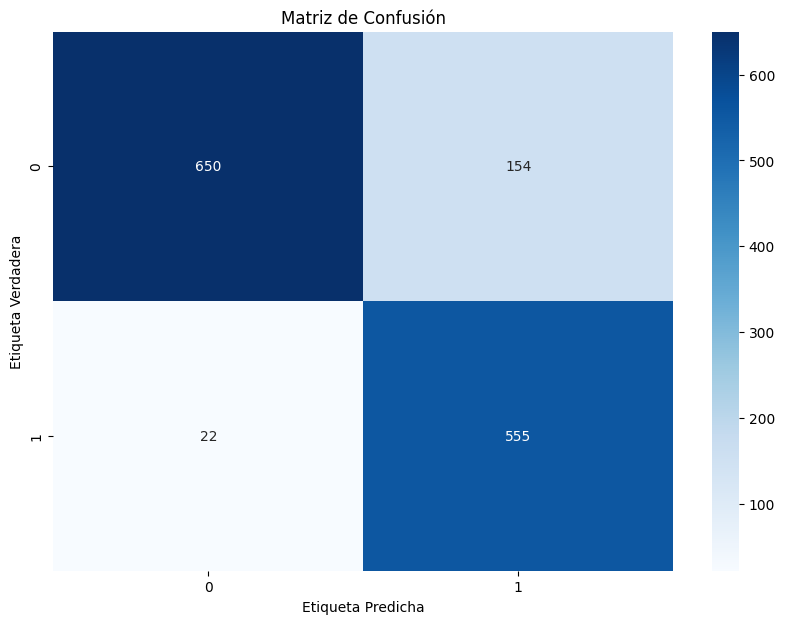

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

AUC: 0.89


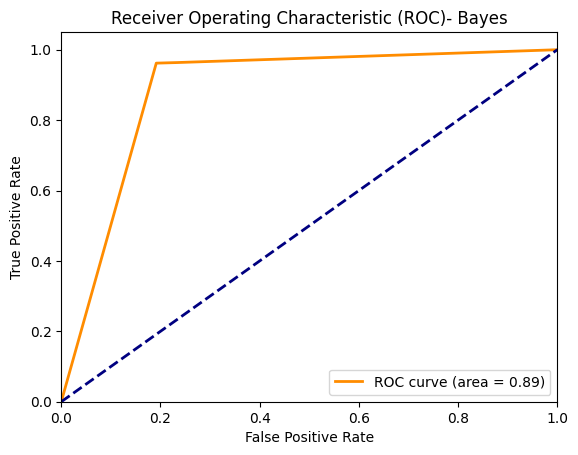

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Paso 1: Obtener las probabilidades predichas del modelo de Bayes
# Usamos predict_proba para obtener las probabilidades de clase
y_prob = nb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase "1" (spam)

# Paso 2: Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Paso 3: Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Paso 4: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)- Bayes')
plt.legend(loc="lower right")
plt.show()


4) Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

Escalamos para aplicar en regresión logística

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Convertir los datos escalados en DataFrames para mantener las etiquetas de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


# Realizar validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
logreg = LogisticRegression(random_state=42, max_iter=1000)

cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Precisión media del modelo (CV): {np.mean(cv_scores) * 100:.2f}%")
print(f"Desviación estándar de la precisión (CV): {np.std(cv_scores) * 100:.2f}%")


# Paso 3: Entrenar el modelo de regresión logística
logreg.fit(X_train_scaled, y_train)

# Paso 4: Hacer predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test_scaled)

# Paso 5: Evaluar el modelo
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Reporte de clasificación (precisión, recall, F1 score)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión media del modelo (CV): 87.36%
Desviación estándar de la precisión (CV): 0.76%
Precisión del modelo: 89.07%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       804
           1       0.93      0.80      0.86       577

    accuracy                           0.89      1381
   macro avg       0.90      0.88      0.88      1381
weighted avg       0.89      0.89      0.89      1381



Matriz de confusión:
[[769  35]
 [116 461]]


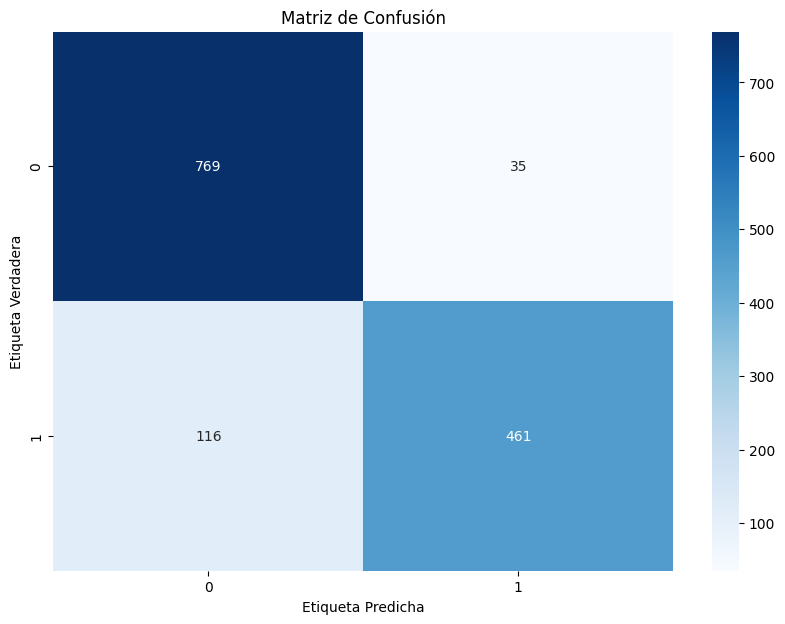

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

AUC (Regresión Logística): 0.95


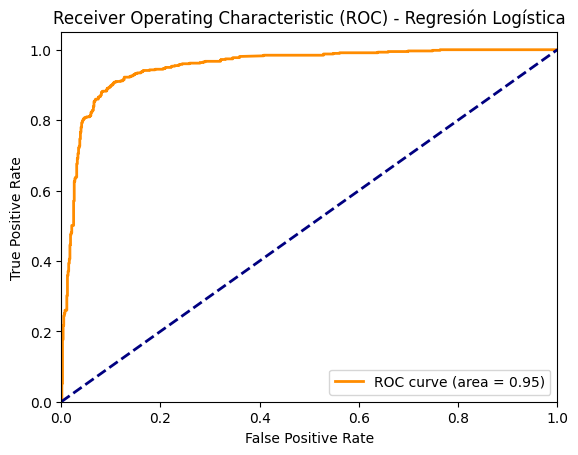

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Paso 1: Obtener las probabilidades predichas del modelo de regresión logística
# Usamos predict_proba para obtener las probabilidades de clase
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase "1" (spam)

# Paso 2: Calcular la curva ROC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)

# Paso 3: Calcular el AUC
auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f"AUC (Regresión Logística): {auc_logreg:.2f}")

# Paso 4: Graficar la curva ROC
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'ROC curve (area = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal para referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Regresión Logística')
plt.legend(loc="lower right")
plt.show()


5) Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

El modelo de regresion logistica es mejor ya que los falsos positivos son menores que en el de Bayes.

Regresion Logistica
35: Correos no spam incorrectamente clasificados como spam (Falsos Positivos).

Bayes
154: Correos no spam incorrectamente clasificados como spam (Falsos Positivos)

6) Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

La precision dio mejor en la regresion logistica al igual que el Recall. Sinembargo el recall es la medicion mas importante ya que clasificar un correo DESEADO como SPAM es mas grave que clasificar un correo SPAM como DESEANO.

7) Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

Usamos predict_proba() del modelo de regresión logística (logreg) para obtener las probabilidades predichas para la clase "1" (spam). Como mencionamos antes, el índice [:, 1] se utiliza para obtener las probabilidades de que un correo sea spam.

Calcular la curva ROC:


Usamos roc_curve() para obtener los valores de la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR) para diferentes umbrales de decisión.
Calcular el AUC (Área bajo la curva):


Usamos roc_auc_score() para calcular el área bajo la curva ROC (AUC), que mide el rendimiento global del modelo. Un valor cercano a 1 significa un muy buen rendimiento en la clasificación.
Graficar la curva ROC:


Utilizamos matplotlib para graficar la curva ROC. En este gráfico:
El eje X representa la tasa de falsos positivos (FPR).
El eje Y representa la tasa de verdaderos positivos (TPR).
La línea diagonal es una referencia que representa una clasificación aleatoria.

Interpretación:

AUC:

Si el AUC es cercano a 1.0, indica que el modelo de regresión logística es muy bueno en la clasificación de correos spam y no spam.
Un AUC cercano a 0.5 significaría que el modelo no es mejor que una clasificación aleatoria.

Comparación con otros modelos:

Si ya calculaste el AUC para otros modelos (como el Bayesiano), puedes comparar estos valores para ver cuál de los modelos tiene mejor rendimiento.

Si tienes los resultados y datos específicos de tu modelo de regresión logística, puedes utilizar este código para obtener la curva ROC y AUC exactos. Si necesitas más ayuda, ¡avísame!